In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
def delete_column(data, index, times):
    """Deletes `times` columns starting from `index`."""
    for _ in range(times):
        data = np.delete(data, index, axis=1)
    return data


def add_column(data, times):
    """Adds a number of empty (zero) columns to a NumPy array."""
    new_cols = np.zeros((len(data), times), dtype=float)
    data = np.hstack((data, new_cols))
    return data

In [3]:
my_data = pd.read_excel('my_data.xlsx',  skiprows=3, index_col=None)
my_data = np.array(my_data)


# Delete first column to remove the index column:
my_data = delete_column(my_data, 0, 1) #remove the timestamp column
mymy_data = delete_column(my_data, 4, 1)  # remove the volume column





my_data_no_volume = pd.DataFrame(my_data)
my_data = my_data_no_volume
my_data

,0,1,2,3,4
0,1.201158,1.208094,1.200855,1.201086,0
1,1.206345,1.206709,1.200495,1.2062,0
2,1.201043,1.20919,1.200495,1.201129,0
3,1.206884,1.208459,1.202154,1.206622,0
4,1.203746,1.2054,1.195972,1.203949,0
...,...,...,...,...,...
2022,1.16546,1.165297,1.160362,1.16546,0
2023,1.163196,1.164958,1.154921,1.163196,0
2024,1.156644,1.162994,1.156083,1.156644,0
2025,1.160241,1.162966,1.155936,1.160241,0


In [4]:
def signal(data):

    data = add_column(data, 5)

    for i in range(len(data)):

       try:

           # Bullish Alpha
           if data[i, 2] < data[i - 5, 2] and data[i, 2] < data[i - 13, 2] and data[i, 2] > data[i - 21, 2] and \
              data[i, 3] > data[i - 1, 3] and data[i, 4] == 0:

               data[i + 1, 4] = 1

           # Bearish Alpha
           elif data[i, 1] > data[i - 5, 1] and data[i, 1] > data[i - 13, 1] and data[i, 1] < data[i - 21, 1] and \
                   data[i, 3] < data[i - 1, 3] and data[i, 5] == 0:

               data[i + 1, 5] = -1

       except IndexError:

           pass

    return data

In [5]:
data_with_signals = signal(my_data_no_volume)

dataframe_with_signals = pd.DataFrame(data_with_signals)


my_data = dataframe_with_signals
my_data

,0,1,2,3,4,5,6,7,8,9
0,1.201158,1.208094,1.200855,1.201086,0,0.0,0.0,0.0,0.0,0.0
1,1.206345,1.206709,1.200495,1.2062,0,0.0,0.0,0.0,0.0,0.0
2,1.201043,1.20919,1.200495,1.201129,0,0.0,0.0,0.0,0.0,0.0
3,1.206884,1.208459,1.202154,1.206622,0,0.0,0.0,0.0,0.0,0.0
4,1.203746,1.2054,1.195972,1.203949,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022,1.16546,1.165297,1.160362,1.16546,0,0.0,0.0,0.0,0.0,0.0
2023,1.163196,1.164958,1.154921,1.163196,0,0.0,0.0,0.0,0.0,0.0
2024,1.156644,1.162994,1.156083,1.156644,0,0.0,0.0,0.0,0.0,0.0
2025,1.160241,1.162966,1.155936,1.160241,0,0.0,0.0,0.0,0.0,0.0


In [6]:

def ohlc_plot_bars(data, window): 
    sample = data[-window:, ] 
    for i in range(len(sample)): 
        plt.vlines(x = i, ymin = sample[i, 2], ymax = sample[i, 1], color = 'black', linewidth = 1)
    if sample[i, 3] > sample[i, 0]:
        plt.vlines(x = i, ymin = sample[i, 0], ymax = sample[i, 3],color = 'black', linewidth = 1)
    if sample[i, 3] < sample[i, 0]:
        plt.vlines(x = i, ymin = sample[i, 3], ymax = sample[i, 0], color = 'black', linewidth = 1)
    if sample[i, 3] == sample[i, 0]:
        plt.vlines(x = i, ymin = sample[i, 3], ymax = sample[i, 0] +0.00003, color = 'black', linewidth = 1.00)
    
    plt.grid()


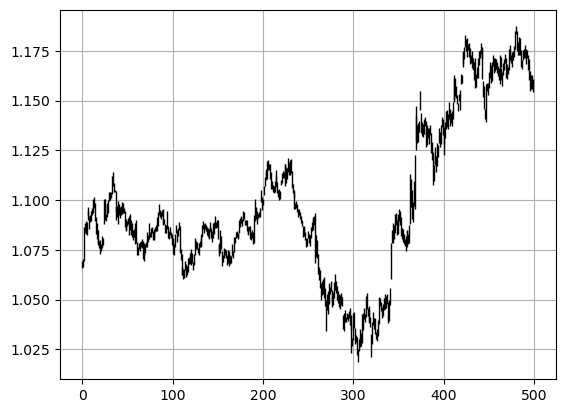

In [7]:

# Convert to NumPy array so it matches what ohlc_plot_bars expects
my_data_np = my_data.to_numpy()

# --- Plot last 500 bars ---
ohlc_plot_bars(my_data_np, 500)

In [11]:
my_data_np
my_data_np_dataframe = pd.DataFrame(my_data_np)
my_data_np_dataframe

,0,1,2,3,4,5,6,7,8,9
0,1.201158,1.208094,1.200855,1.201086,0,0.0,0.0,0.0,0.0,0.0
1,1.206345,1.206709,1.200495,1.2062,0,0.0,0.0,0.0,0.0,0.0
2,1.201043,1.20919,1.200495,1.201129,0,0.0,0.0,0.0,0.0,0.0
3,1.206884,1.208459,1.202154,1.206622,0,0.0,0.0,0.0,0.0,0.0
4,1.203746,1.2054,1.195972,1.203949,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022,1.16546,1.165297,1.160362,1.16546,0,0.0,0.0,0.0,0.0,0.0
2023,1.163196,1.164958,1.154921,1.163196,0,0.0,0.0,0.0,0.0,0.0
2024,1.156644,1.162994,1.156083,1.156644,0,0.0,0.0,0.0,0.0,0.0
2025,1.160241,1.162966,1.155936,1.160241,0,0.0,0.0,0.0,0.0,0.0


/var/folders/pp/x__1tf4n7j98nw_8bwlmgxj00000gn/T/ipykernel_5659/4100284253.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy=(x,y), arrowprops=dict(width=9, headlength=-11,
/var/folders/pp/x__1tf4n7j98nw_8bwlmgxj00000gn/T/ipykernel_5659/4100284253.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy=(x, y),arrowprops=dict(width=9, headlength=11,


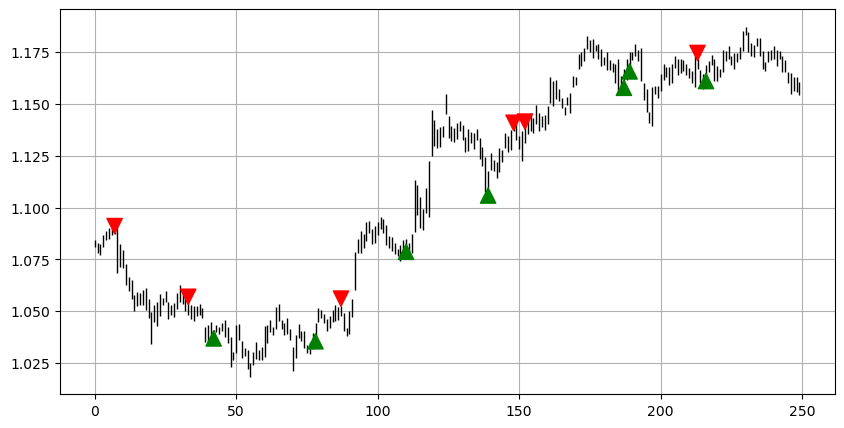

In [12]:
def signal_chart(data, position, buy_column, sell_column, window):
    sample = data[-window:, ]
    fig, ax = plt.subplots(figsize =(10,5))
    ohlc_plot_bars(data, window)
    
    for i in range(len(sample)):
        if sample[i, buy_column]==1:
            x=i
            y=sample[i, position]
            
            ax.annotate(' ', xy=(x, y),arrowprops=dict(width=9, headlength=11, 
                                                      headwidth=11, 
                                                      facecolor='green', color='green'))
        elif sample[i, sell_column] == -1:
            x=i
            y=sample[i, position]
            ax.annotate(' ', xy=(x,y), arrowprops=dict(width=9, headlength=-11, 
                                                       headwidth=-11, facecolor='red', color='red'))
            
            

signal_chart(my_data_np, 0, 4, 5,window=250)